# Seaborn - Intro

[seaborn documentation](https://seaborn.pydata.org)

In [37]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Install and Import Seaborn

conda install seaborn

In [38]:
# common alias is sns for seaborn
import seaborn as sns

### Prep Dataset for Plotting

In [39]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

## Horizontal Bar Chart - Matplotlib vs. Seaborn


### Matplotlib Horizontal Bar

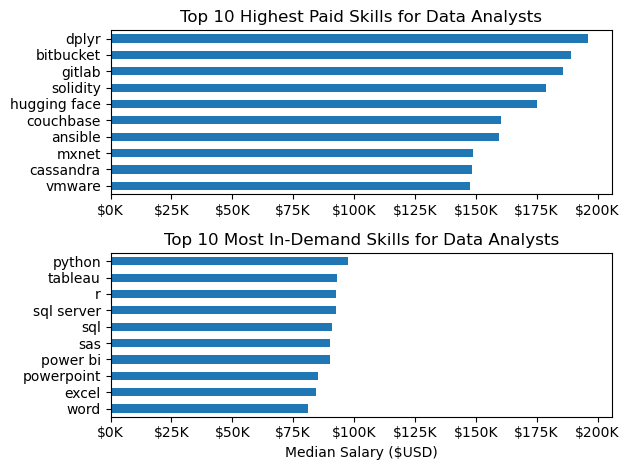

In [40]:
fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim()) # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

### Seaborn Horizontal Bar

[seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)
* Note: Very similar to boxplots in Matplotlib

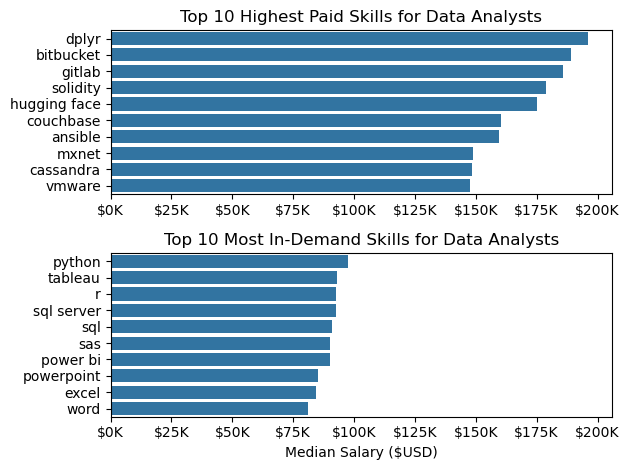

In [41]:
fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for Data Analysts
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analysts
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim()) # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

#### Change the Color Palette 

* [Color palette choices](https://seaborn.pydata.org/examples/palette_choices.html#color-palette-choices)
* [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#choosing-color-palettes)
    * Hue is the component that distinguishes “different colors” in a non-technical sense. It’s property of color that leads to first-order names like “red” and “blue”
    * [Tools for choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#tools-for-choosing-color-palettes)
    * [seaborn.color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn-color-palette)

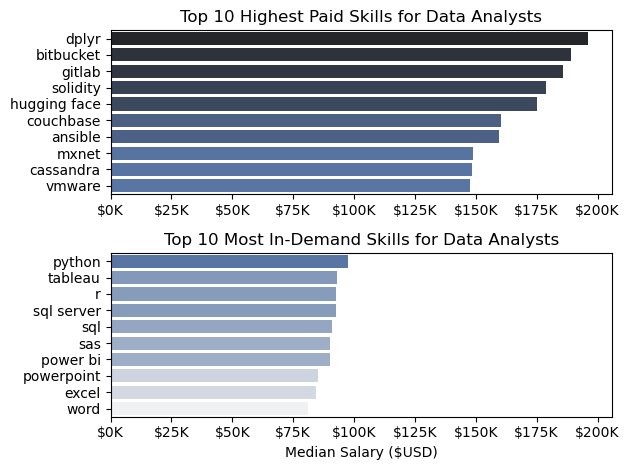

In [42]:
fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for Data Analysts
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
# See above markup for information on hue and palette properties
# Hue: Here use hue property to use the median columns magnitude to change the gradient of the color
# Palette: set the palette for color change to use dark blue gradient; This is an example of a sequential color palette.
# Use _r on the color choose to reverse the color scheme.  In this case we want higher values to be darker so we reverse the color
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analysts
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
# Palette: set the palette for color change to use light blue gradient;
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim()) # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

#### Change Theme
* [seaborn.set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn-set-theme)
    * Set aspects of the visual theme for all matplotlib and seaborn plots.

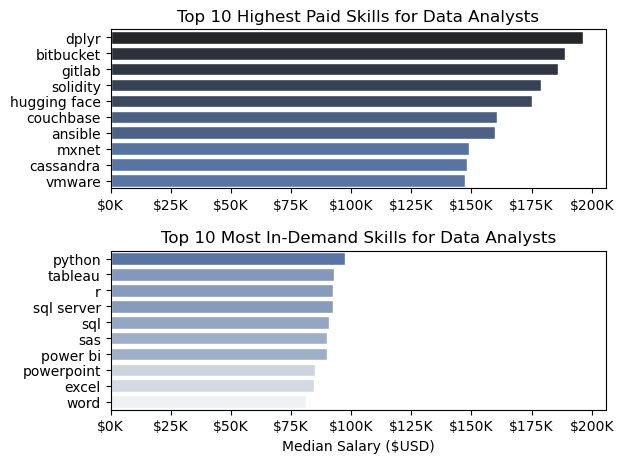

In [43]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
# See above markup for information on hue and palette properties
# Hue: Here use hue property to use the median columns magnitude to change the gradient of the color
# Palette: set the palette for color change to use dark blue gradient; This is an example of a sequential color palette.
# Use _r on the color choose to reverse the color scheme.  In this case we want higher values to be darker so we reverse the color
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analysts
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
# Palette: set the palette for color change to use light blue gradient;
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim()) # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

## Histogram - Matplotlib vs. Seaborn

### Matplotlib Histogram

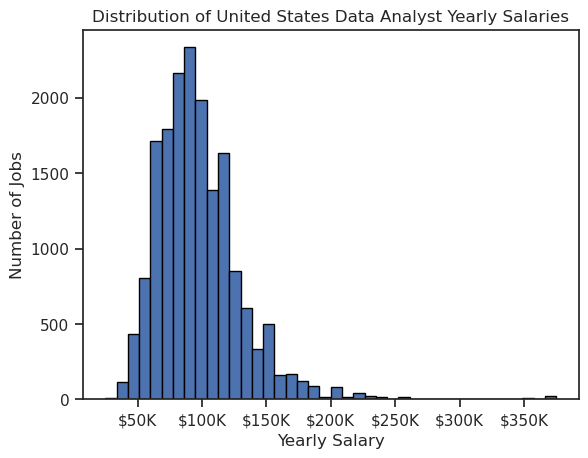

In [44]:
# Plot the Histogram based on salary year average of data analysts in the United States
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

### Seaborn Histogram

* [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)
    * Traditional Histogram
    * Not using this one as it only supports jagged edging and we want smooth curve plot as end result.
* [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.displot.html)
    * Distribution Plot
    * Has Histogram as the default type of plot
    * Allows for much smoother curves in the visualization
* [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)
    * A kernel density estimate (KDE) Plot 
    * In this example, the kind of plot used to get the smooth distribution curve on the distplot

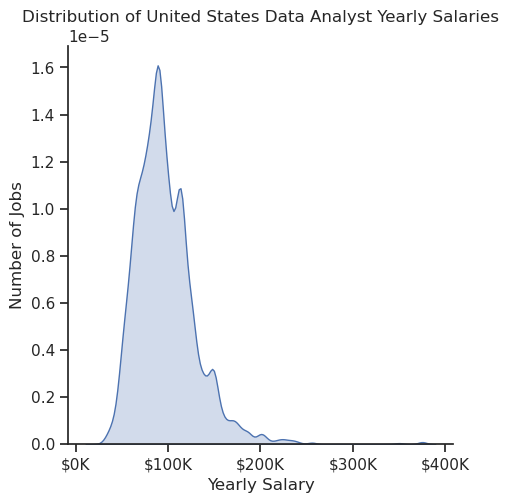

In [45]:
# Plot the Histogram based on salary year average of data analysts in the United States

# Don't need to set theme again since it's set in horizontal bar section above for the environment.
# However, putting it here to demonstration purposes
sns.set_theme(style='ticks')

sns.displot(data=df_DA_US['salary_year_avg'], kind='kde', fill=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

## Box Plot - Matplotlib vs. Seaborn

In [ ]:
# Labels and filter for the different job titles for our plot
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Only get data jobs from the United States
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

# Use List comprehension to get lists of jobs for each job title to plot
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

### Matplotlib Box Plot

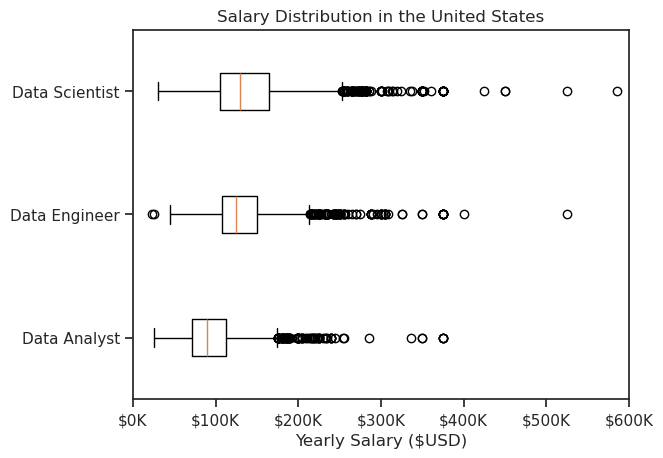

In [47]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K' ))

# 1,000K outlier exists but limiting scope for better insights
plt.xlim(0, 600_000)
plt.show()

### Seaborn Box Plot

* [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

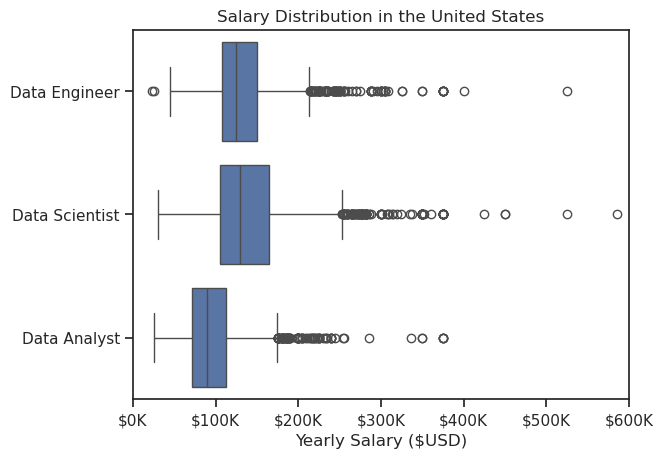

In [48]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K' ))

# 1,000K outlier exists but limiting scope for better insights
plt.xlim(0, 600_000)
plt.show()

# Problems

In [ ]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Top Companies Bar Plot (2.20.1) - Problem

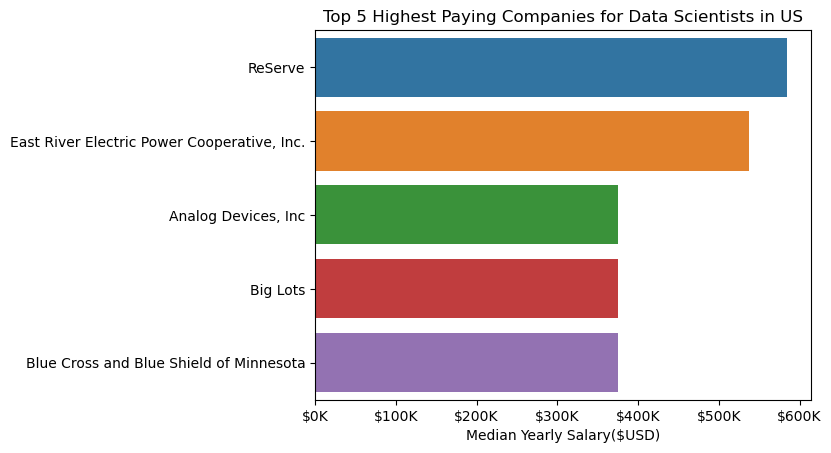

In [53]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US = df_DS_US.dropna(subset='salary_year_avg')
df_top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()
df_top_companies = df_top_companies.sort_values(by='salary_year_avg', ascending=False)


sns.barplot(data=df_top_companies, x='salary_year_avg', y='company_name', hue='company_name')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlabel('Median Yearly Salary($USD)')
plt.ylabel('')
plt.title('Top 5 Highest Paying Companies for Data Scientists in US')
plt.show()

## Data Scientist Salary Histogram (2.20.2) - Problem

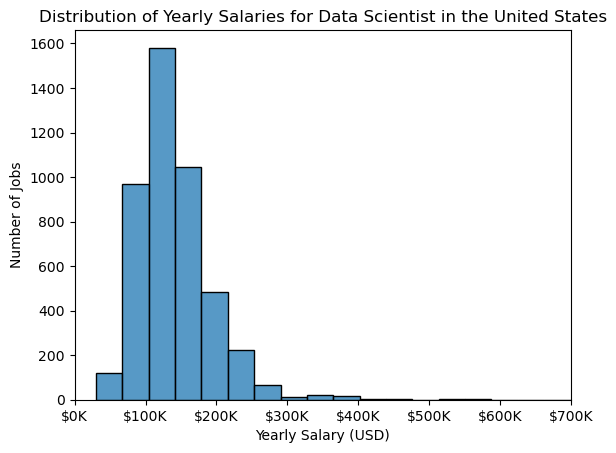

In [ ]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

sns.histplot(data=df_DS_US['salary_year_avg'], bins=25)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0,700_000)
plt.title( 'Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel( 'Yearly Salary (USD)')
plt.ylabel( 'Number of Jobs' )
plt.show()

##  Data Roles Salary Box Plot (2.20.3) - Problem

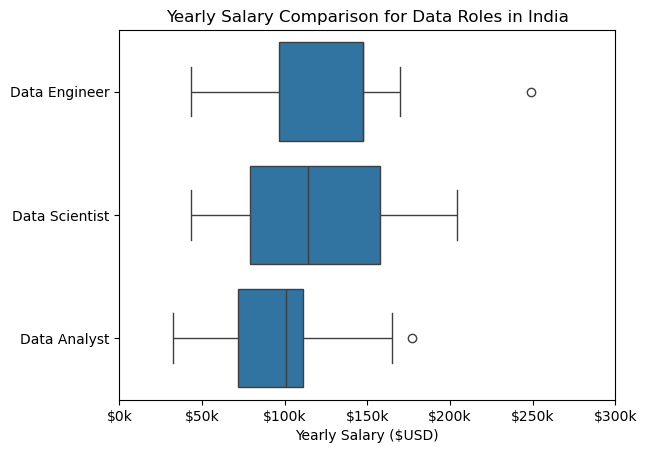

In [71]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()
df_IN = df_IN.dropna(subset=['salary_year_avg'])

sns.boxplot(data=df_IN, x='salary_year_avg', y='job_title_short')

plt.xlim(0, 300_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.ylabel('')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

## Salary Distribution for United States (2.20.4) - Problem

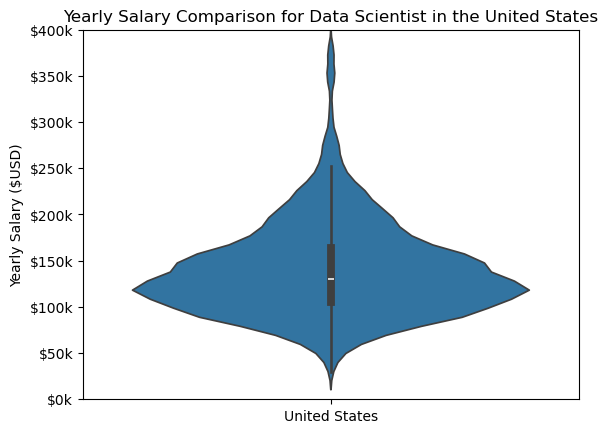

In [74]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

sns.violinplot(data=df_DS_US,x='job_country', y='salary_year_avg' )

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}k'))
plt.ylim(0,400_000)
plt.title('Yearly Salary Comparison for Data Scientist in the United States')
plt.xlabel('')
plt.ylabel('Yearly Salary ($USD)')
plt.show()